Histogram Equalization

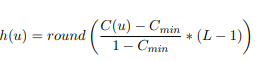

Import Libraries

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


Read Image and Convert to Gray Scale

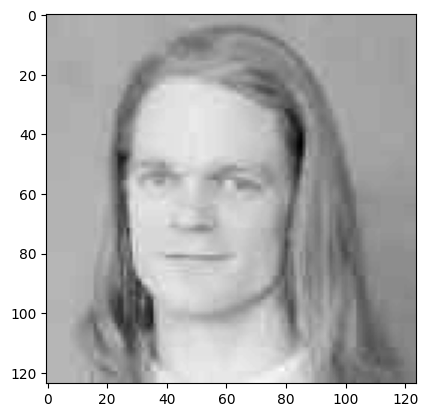

In [8]:
image_path = "images1.jpg"
img1 = cv2.imread(image_path,0)
plt.imshow(img1,cmap="gray")

2D array is converted to a 1D array.


In [9]:
fl = img1.flatten()


Histogram and the bins of the image are computed.


In [10]:
hist,bins = np.histogram(img1,256,[0,255])


Plot input Image Histogram

(array([  2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   3.,
          0.,   0.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   2.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,   6.,
          0.,   0.,   7.,   0.,   0.,   7.,   0.,   4.,   0.,   0.,  10.,
          0.,   0.,   7.,   0.,   0.,   7.,   0.,  19.,   0.,   0.,  16.,
          0.,   0.,  21.,   0.,  18.,   0.,   0.,  17.,   0.,   0.,  18.,
          0.,   0.,  22.,   0.,  21.,   0.,   0.,  26.,   0.,   0.,  30.,
          0.,  39.,   0.,   0.,  34.,   0.,   0.,  62.,   0.,   0.,  44.,
          0.,  67.,   0.,   0.,  70.,   0.,   0., 103.,   0.,   0., 113.,
          0., 111.,   0.,   0., 110.,   0.,   0., 129.,   0., 140.,   0.,
          0., 157.,   0.,   0., 167.,   0.,   0., 175.,   0., 183.,   0.,
          0., 224.,   0.,   0., 194.,   0.,   0., 209.,   0., 232.,   0.,
          0., 251.,   0.,   0., 324.,   0., 316.,   0.,   0., 345.,   0.,
          0., 246.,   0.,   0., 299., 

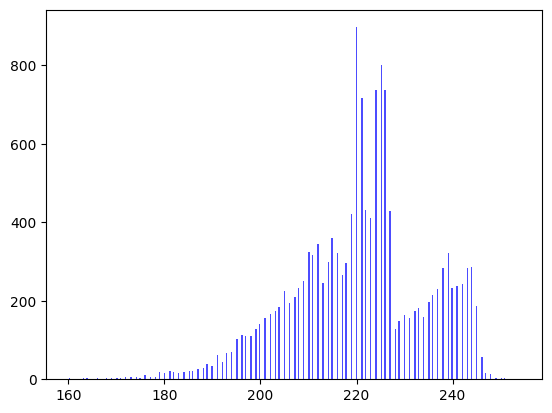

In [11]:
plt.hist(img1.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8)


 cumulative distribution function is computed


In [12]:
cdf = hist.cumsum()
cdf

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

Places where cdf=0 is masked or ignored and rest is stored in cdf_m.


In [13]:
cdf_m = np.ma.masked_equal(cdf,0)


Histogram equalization is performed.


In [14]:
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m


The masked places in cdf_m are now 0.


In [15]:
cdf = np.ma.filled(cdf_m,0).astype('uint8')


cdf values are assigned in the flattened array.


In [16]:
img2 = cdf[fl]


image2 is 1D so we use reshape command to.make it into 2D

In [17]:
img2 = np.reshape(img2,img1.shape)


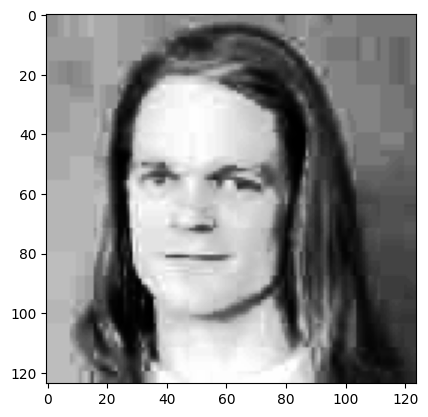

In [18]:
plt.imshow(img2,cmap="gray")

(array([ 57.,  49.,  74.,  43.,  56.,  73.,  62.,  44.,  67.,  70.,   0.,
        103.,   0., 113.,   0., 111.,   0., 110.,   0., 129.,   0., 140.,
          0.,   0., 157.,   0., 167.,   0.,   0., 175.,   0.,   0., 183.,
          0.,   0.,   0., 224.,   0.,   0., 194.,   0.,   0.,   0., 209.,
          0.,   0.,   0., 232.,   0.,   0.,   0., 251.,   0.,   0.,   0.,
          0., 324.,   0.,   0.,   0.,   0., 316.,   0.,   0.,   0.,   0.,
          0., 345.,   0.,   0.,   0., 246.,   0.,   0.,   0.,   0., 299.,
          0.,   0.,   0.,   0.,   0., 360.,   0.,   0.,   0.,   0., 323.,
          0.,   0.,   0.,   0., 267.,   0.,   0.,   0.,   0., 297.,   0.,
          0.,   0.,   0.,   0.,   0., 422.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 897.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 716.,
          0.,   0.,   0.,   0.,   0.,   0., 431.,   0.,   0.,   0.,   0.,
          0.,   0., 410.,   0.,   0., 

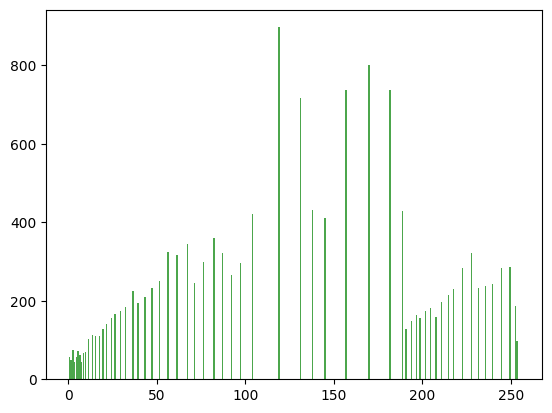

In [19]:
hist,bins = np.histogram(img2,256,[0,255])
plt.hist(img2.ravel(), bins=256, color='green', alpha=0.7, rwidth=0.8)


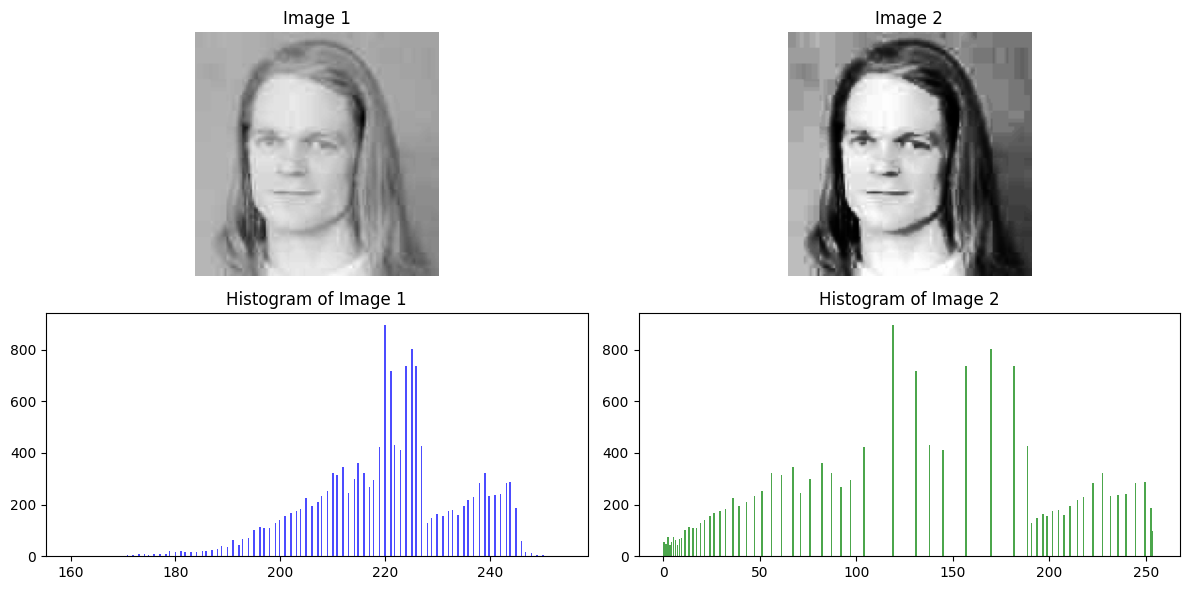

In [20]:
# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

# Plot histograms
plt.subplot(2, 2, 3)
plt.hist(img1.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Histogram of Image 1')

plt.subplot(2, 2, 4)
plt.hist(img2.ravel(), bins=256, color='green', alpha=0.7, rwidth=0.8)
plt.title('Histogram of Image 2')


plt.tight_layout()
plt.show()